In [1]:
!pip install fastai --upgrade
!pip install timm wwf

     |████████████████████████████████| 194kB 17.9MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 243kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 296kB 16.4MB/s 


In [2]:
!wget https://www.dropbox.com/s/qrdswgzv63o3opg/datasetCorregido.zip?dl=1 -O erm.zip

--2021-03-09 10:04:51--  https://www.dropbox.com/s/qrdswgzv63o3opg/datasetCorregido.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/qrdswgzv63o3opg/datasetCorregido.zip [following]
--2021-03-09 10:04:52--  https://www.dropbox.com/s/dl/qrdswgzv63o3opg/datasetCorregido.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce553ac5a88e9882a5e2e2c0a70.dl.dropboxusercontent.com/cd/0/get/BKVVd8_Ac_HQU2P2gb5Bu9SCS5JxMCIV-SWTbEcC1v9yhOvUWNVdYHC221XNAAXqreqEBMzIwXAnTfLbyIHnafZVo64vUw2yy-Tj0KKZCPzOFjl9h4xoxGbRDstGcyCcSqQ6_KDO0F-CfXb-3hsdKB9n/file?dl=1# [following]
--2021-03-09 10:04:52--  https://uce553ac5a88e9882a5e2e2c0a70.dl.dropboxusercontent.com/cd/0/get/BKVVd8_Ac_HQU2P2gb5Bu9SCS5JxMCIV-SWTbEcC1v9yhOvUWNVdYHC221XNAAXq

In [3]:
!unzip erm.zip

Archive:  erm.zip
   creating: datasetCorregido/
   creating: datasetCorregido/train/
   creating: datasetCorregido/train/no/
  inflating: datasetCorregido/train/no/anonymized_482127.jpg  
  inflating: datasetCorregido/train/no/anonymized_174749.jpg  
  inflating: datasetCorregido/train/no/anonymized_734047.jpg  
  inflating: datasetCorregido/train/no/anonymized_581767.jpg  
  inflating: datasetCorregido/train/no/anonymized_1400777.jpg  
  inflating: datasetCorregido/train/no/anonymized_347431.jpg  
  inflating: datasetCorregido/train/no/anonymized_626433.jpg  
  inflating: datasetCorregido/train/no/anonymized_1372303.jpg  
  inflating: datasetCorregido/train/no/anonymized_1324599.jpg  
  inflating: datasetCorregido/train/no/anonymized_196853.jpg  
  inflating: datasetCorregido/train/no/anonymized_687000.jpg  
  inflating: datasetCorregido/train/no/anonymized_504041.jpg  
  inflating: datasetCorregido/train/no/anonymized_1414333.jpg  
  inflating: datasetCorregido/train/no/anonymized_3

In [4]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *

In [5]:
path = Path('datasetCorregido/')
trainPath = path/'train'
testPath = path/'test'

In [6]:
def getDataBlock(presize=512,size=384):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(presize),
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=360,max_warp=0,max_zoom=1.1,
                      max_lighting=0.1,p_lighting=0.5), Normalize.from_stats(*imagenet_stats)])

In [7]:
db512 = getDataBlock()
dls512 = db512.dataloaders(trainPath,bs=8)

In [8]:
from fastai.vision.all import *
import timm
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest18')
]

In [9]:
modelo=timm.models.vision_transformer.vit_base_patch16_384(num_classes=2,pretrained=True)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-vitjx/jx_vit_base_p16_384-83fb41ba.pth" to /root/.cache/torch/hub/checkpoints/jx_vit_base_p16_384-83fb41ba.pth


## Ranger

In [10]:
opt_func = partial(ranger, beta=0.99, eps=1e-6)

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

SuggestedLRs(lr_min=0.0003019951749593019, lr_steep=6.918309736647643e-06)

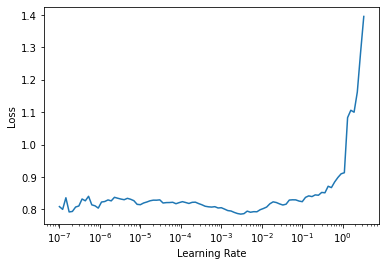

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.698448,0.689885,0.532110,0.539957,0.728863,06:17
1,0.688582,0.673543,0.567278,0.560729,0.807580,06:17


Better model found at epoch 0 with valid_loss value: 0.6898847818374634.


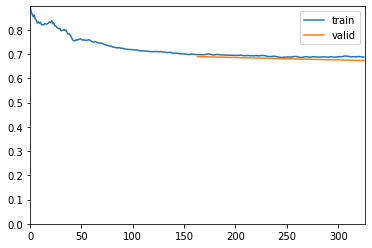

Better model found at epoch 1 with valid_loss value: 0.6735426783561707.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.670650,0.672169,0.571865,0.579747,0.667638,06:16
1,0.669151,0.669522,0.576453,0.595376,0.600583,06:16
2,0.665881,0.665343,0.587156,0.628070,0.521866,06:16
3,0.660661,0.658211,0.597859,0.644928,0.518950,06:17
4,0.651034,0.645917,0.600917,0.614525,0.641399,06:17
5,0.634904,0.654445,0.608563,0.720812,0.413994,06:17
6,0.636565,0.635540,0.623853,0.677656,0.539359,06:17
7,0.619714,0.654932,0.625382,0.788235,0.390671,06:17
8,0.615417,0.623868,0.643731,0.708333,0.545190,06:16
9,0.597536,0.615965,0.648318,0.710037,0.556851,06:17


Better model found at epoch 0 with valid_loss value: 0.6721690893173218.


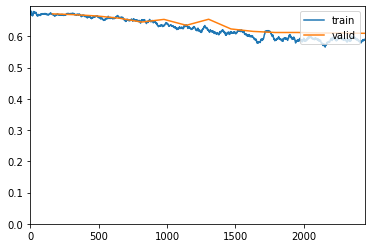

Better model found at epoch 1 with valid_loss value: 0.6695220470428467.
Better model found at epoch 2 with valid_loss value: 0.6653425693511963.
Better model found at epoch 3 with valid_loss value: 0.6582111120223999.
Better model found at epoch 4 with valid_loss value: 0.6459169983863831.
Better model found at epoch 6 with valid_loss value: 0.6355400681495667.
Better model found at epoch 8 with valid_loss value: 0.6238680481910706.
Better model found at epoch 9 with valid_loss value: 0.615964949131012.
Better model found at epoch 10 with valid_loss value: 0.6124668717384338.
Better model found at epoch 12 with valid_loss value: 0.6109022498130798.
Better model found at epoch 13 with valid_loss value: 0.6106409430503845.
Better model found at epoch 14 with valid_loss value: 0.6099221706390381.


In [ ]:
learn.fine_tune(15,freeze_epochs=2)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

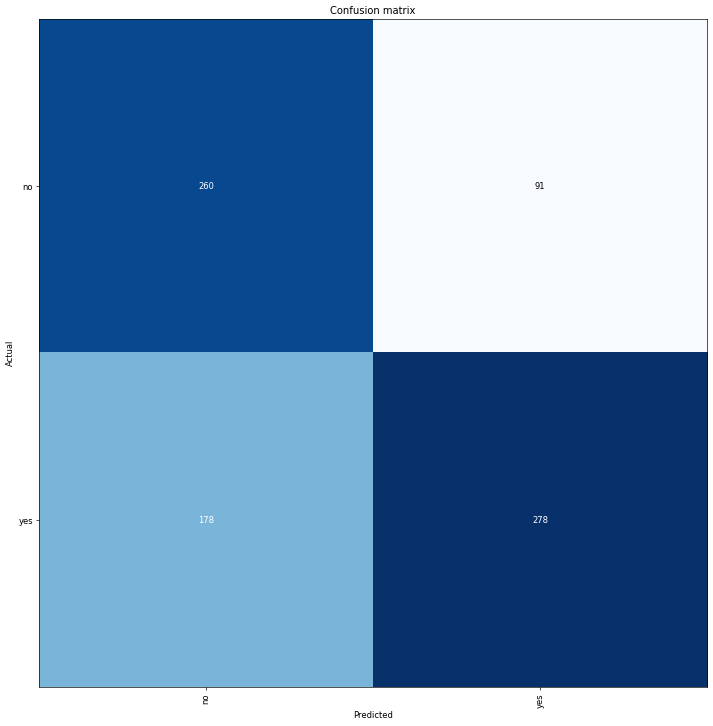

In [ ]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.6666666865348816.


(#4) [0.6095073819160461,0.6666666865348816,0.7533875338753387,0.6096491228070176]

## Faltten

In [11]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.711899,0.698966,0.486239,0.486239,1.000000,05:50
1,0.694452,0.692801,0.513761,0.000000,0.000000,05:54


Better model found at epoch 0 with valid_loss value: 0.6989656686782837.


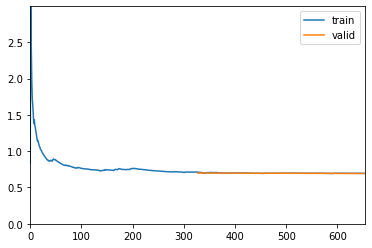

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Better model found at epoch 1 with valid_loss value: 0.6928005814552307.


In [12]:
learn.fit_flat_cos(2,lr=1e-3)

In [13]:
learn.unfreeze()

SuggestedLRs(lr_min=1.9054606673307718e-05, lr_steep=0.007585775572806597)

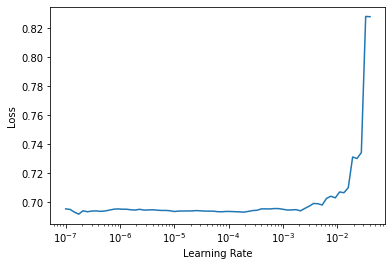

In [14]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.693815,0.693154,0.490826,0.485876,0.811321,05:54
1,0.692837,0.694217,0.490826,0.487923,0.952830,05:54
2,0.693214,0.694402,0.486239,0.486196,0.996855,05:54
3,0.691317,0.697949,0.484709,0.485452,0.996855,05:54


Better model found at epoch 0 with valid_loss value: 0.6931541562080383.


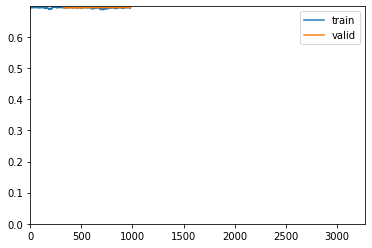

No improvement since epoch 0: early stopping


In [15]:
learn.fit_flat_cos(10,lr=1e-4)

In [16]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

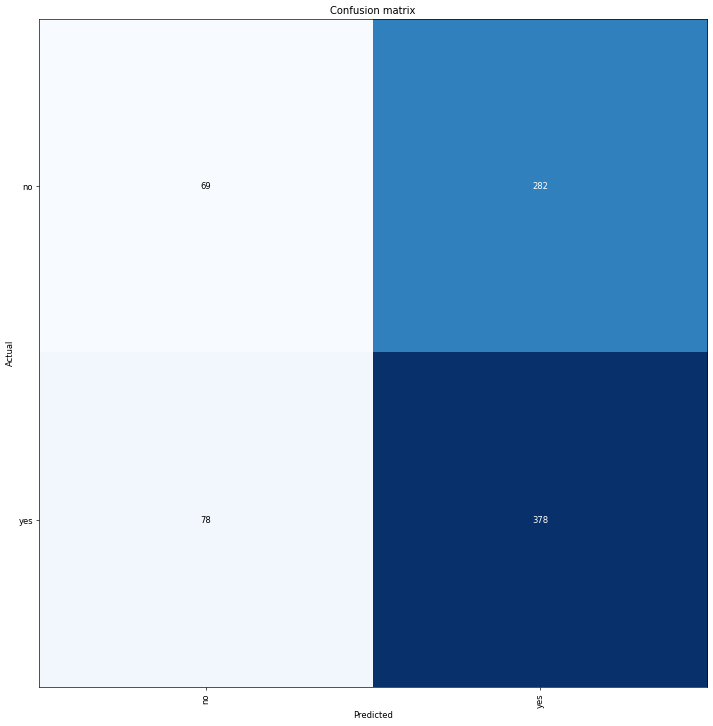

In [17]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [18]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.553903341293335.


(#4) [0.6920673251152039,0.553903341293335,0.5727272727272728,0.8289473684210527]

## LabelSmoothing

In [19]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy())

SuggestedLRs(lr_min=0.00010000000474974513, lr_steep=0.0691830962896347)

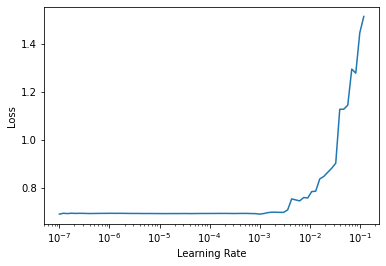

In [20]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.692376,0.694156,0.481651,0.483871,0.990566,05:54
1,0.693015,0.693606,0.484709,0.483126,0.855346,05:55


Better model found at epoch 0 with valid_loss value: 0.6941561102867126.


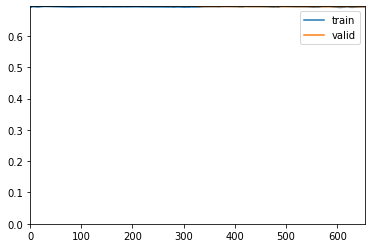

Better model found at epoch 1 with valid_loss value: 0.6936059594154358.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.692179,0.693789,0.484709,0.483066,0.852201,05:55
1,0.693301,0.692951,0.510703,0.497664,0.669811,05:56
2,0.690874,0.695994,0.484709,0.485179,0.977987,05:55
3,0.691548,0.692630,0.503058,0.492662,0.738994,05:55
4,0.693529,0.691905,0.529052,0.519084,0.427673,05:55
5,0.693637,0.691665,0.506116,0.493473,0.594340,05:55
6,0.688319,0.691819,0.529052,0.514368,0.562893,05:55
7,0.690119,0.691917,0.516820,0.502101,0.751572,05:55
8,0.691262,0.691779,0.530581,0.511294,0.783019,05:55


Better model found at epoch 0 with valid_loss value: 0.6937894225120544.


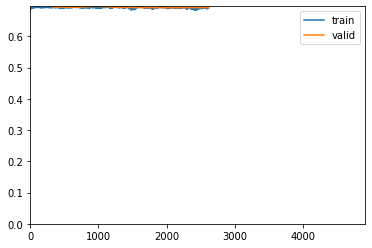

Better model found at epoch 1 with valid_loss value: 0.6929506659507751.
Better model found at epoch 3 with valid_loss value: 0.6926302909851074.
Better model found at epoch 4 with valid_loss value: 0.6919046640396118.
Better model found at epoch 5 with valid_loss value: 0.6916651725769043.
No improvement since epoch 5: early stopping


In [21]:
learn.fine_tune(15,freeze_epochs=2,base_lr=1e-4)

In [22]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

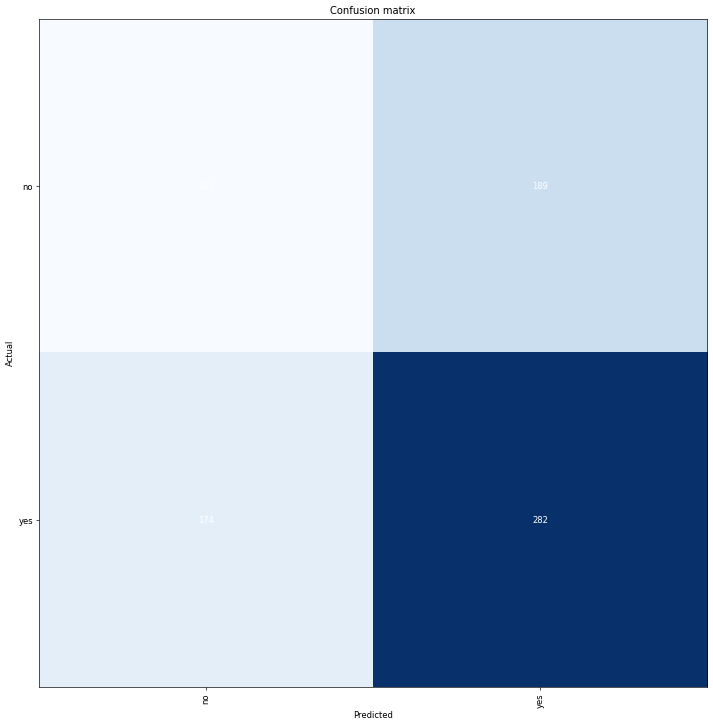

In [23]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [24]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5501858592033386.


(#4) [0.6911157369613647,0.5501858592033386,0.5987261146496815,0.618421052631579]

## MixUp

In [25]:
mixup=MixUp()
callbacks2 = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest18'),
    mixup
]

In [26]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.689205,0.697251,0.486239,0.485246,0.930818,05:56
1,0.692099,0.690322,0.536697,0.527273,0.455975,05:55


Better model found at epoch 0 with valid_loss value: 0.6972506642341614.


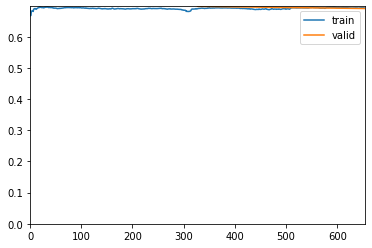

Better model found at epoch 1 with valid_loss value: 0.6903219223022461.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.691040,0.689734,0.524465,0.509333,0.600629,05:56
1,0.688226,0.689882,0.533639,0.520000,0.531447,05:56
2,0.689805,0.693468,0.496942,0.490756,0.918239,05:55
3,0.691931,0.690461,0.512232,0.498947,0.745283,05:55


Better model found at epoch 0 with valid_loss value: 0.6897339224815369.


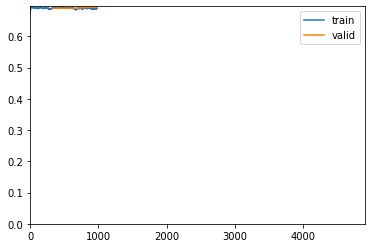

No improvement since epoch 0: early stopping


In [27]:
learn.fine_tune(15,freeze_epochs=2,base_lr=1e-4)

In [28]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

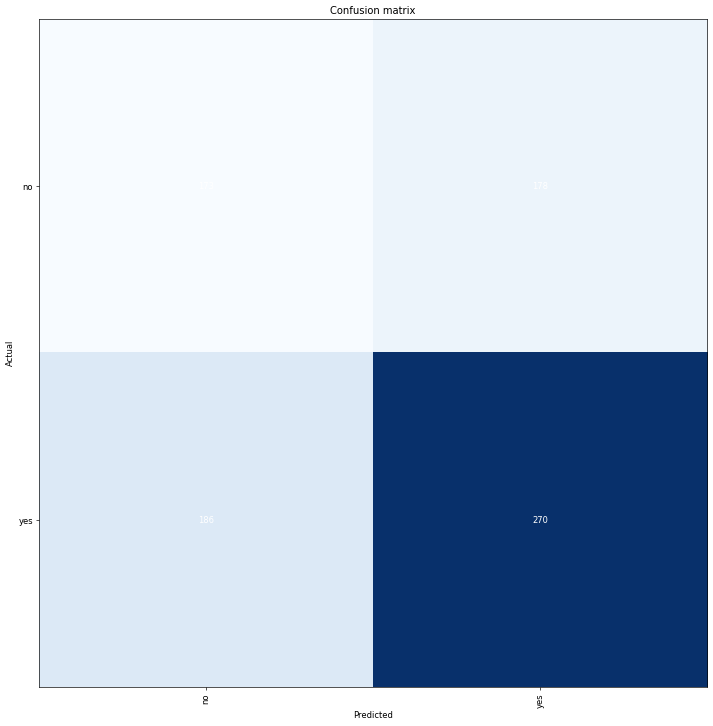

In [29]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [30]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.548946738243103.


(#4) [0.6930116415023804,0.548946738243103,0.6026785714285714,0.5921052631578947]

## Ranger + Flat cosin Anneal

In [31]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.690934,0.691608,0.527523,0.508806,0.817610,05:57
1,0.685412,0.690165,0.515290,0.501119,0.704403,05:57


Better model found at epoch 0 with valid_loss value: 0.6916084289550781.


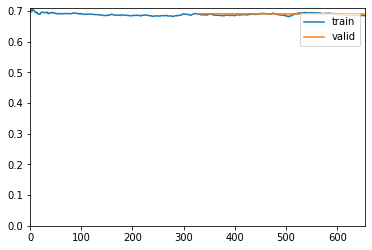

Better model found at epoch 1 with valid_loss value: 0.6901652812957764.


In [32]:
learn.fit_flat_cos(2,lr=1e-3)

In [33]:
learn.unfreeze()

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=2.7542285919189453)

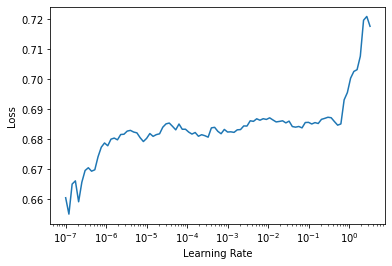

In [34]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.684085,0.690282,0.518349,0.503326,0.713836,05:57
1,0.685833,0.690401,0.521407,0.505423,0.732704,05:57
2,0.686689,0.690499,0.521407,0.505353,0.742138,05:57
3,0.687413,0.690607,0.518349,0.503171,0.748428,05:56


Better model found at epoch 0 with valid_loss value: 0.6902821063995361.


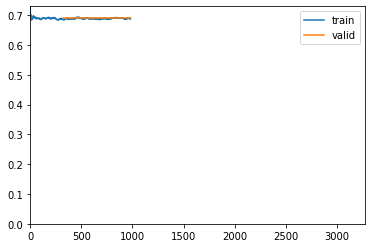

No improvement since epoch 0: early stopping


In [35]:
learn.fit_flat_cos(10,lr=1e-4)

In [36]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [37]:
learn.dls = dlsTest

In [38]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5662949085235596.


(#4) [0.6901768445968628,0.5662949085235596,0.5967153284671532,0.7171052631578947]

## Ranger+Flar Cossin Anneal+LabelSmoothing

In [39]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func,loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.694437,0.690745,0.515290,0.501119,0.704403,05:57
1,0.690544,0.690767,0.518349,0.503341,0.710692,05:57


Better model found at epoch 0 with valid_loss value: 0.6907449960708618.


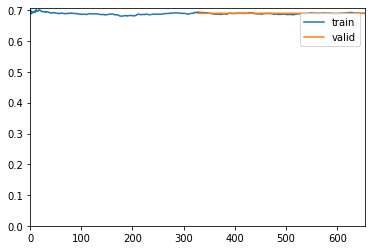

In [40]:
learn.fit_flat_cos(2,lr=1e-3)

In [41]:
learn.unfreeze()

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=1.0964782238006592)

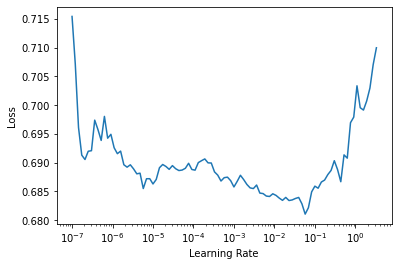

In [42]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.688917,0.690773,0.518349,0.503341,0.710692,05:57
1,0.686419,0.690854,0.519878,0.504405,0.720126,05:57
2,0.691508,0.691018,0.522936,0.506438,0.742138,05:57
3,0.691074,0.691186,0.519878,0.504202,0.754717,05:56


Better model found at epoch 0 with valid_loss value: 0.6907733678817749.


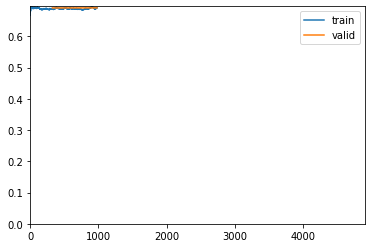

No improvement since epoch 0: early stopping


In [43]:
learn.fit_flat_cos(15,lr=1e-4)

In [44]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [45]:
learn.dls = dlsTest

In [ ]:
learn.validate()

## Ranger +Flat + Label + MixUp

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func,loss_func=LabelSmoothingCrossEntropy())

In [ ]:
learn.fit_flat_cos(2,lr=1e-3)

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_flat_cos(15,lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
learn.validate()

## Ranger + Flat + MixUp

In [ ]:
mixup=MixUp()
callbacks2 = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest18'),
    mixup
]

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

In [ ]:
learn.fit_flat_cos(2,lr=1e-3)

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_flat_cos(15,lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()

## Ranger + MixUp

In [ ]:
#opt_func = partial(ranger, beta=(0.9,0.99), eps=1e-6)

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

In [ ]:
learn.fine_tune(15,freeze_epochs=2,base_lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()

## Faltten + MixUp

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()])

In [ ]:
learn.fit_flat_cos(2,lr=1e-3)

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_flat_cos(10,lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()

## Ranger + Label

In [ ]:
#opt_func = partial(ranger, beta=(0.9,0.99), eps=1e-6)

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func,loss_func=LabelSmoothingCrossEntropy())

In [ ]:
learn.fine_tune(15,freeze_epochs=2,base_lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()

## Faltten + Label

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy())

In [ ]:
learn.fit_flat_cos(2,lr=1e-3)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_flat_cos(10,lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()

## Label + MixUp

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy())

In [ ]:
learn.fine_tune(15,freeze_epochs=2,base_lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()